# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

parks = pd.read_csv("parks.csv")
species = pd.read_csv("species.csv")

parks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Park Code  56 non-null     object 
 1   Park Name  56 non-null     object 
 2   State      56 non-null     object 
 3   Acres      56 non-null     int64  
 4   Latitude   56 non-null     float64
 5   Longitude  56 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.8+ KB


C:\Users\kelle\AppData\Local\Temp\ipykernel_5432\1088667766.py:9: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  species = pd.read_csv("species.csv")


In [13]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119248 entries, 0 to 119247
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Species ID           119248 non-null  object
 1   Park Name            119248 non-null  object
 2   Category             119248 non-null  object
 3   Order                117776 non-null  object
 4   Family               117736 non-null  object
 5   Scientific Name      119248 non-null  object
 6   Common Names         119248 non-null  object
 7   Record Status        119248 non-null  object
 8   Occurrence           99106 non-null   object
 9   Nativeness           94203 non-null   object
 10  Abundance            76306 non-null   object
 11  Seasonality          20157 non-null   object
 12  Conservation Status  4718 non-null    object
 13  Unnamed: 13          5 non-null       object
dtypes: object(14)
memory usage: 12.7+ MB


In [15]:
combined = parks.merge(species, how = 'inner', right_on='Park Name', left_on ='Park Name')
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119248 entries, 0 to 119247
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Park Code            119248 non-null  object 
 1   Park Name            119248 non-null  object 
 2   State                119248 non-null  object 
 3   Acres                119248 non-null  int64  
 4   Latitude             119248 non-null  float64
 5   Longitude            119248 non-null  float64
 6   Species ID           119248 non-null  object 
 7   Category             119248 non-null  object 
 8   Order                117776 non-null  object 
 9   Family               117736 non-null  object 
 10  Scientific Name      119248 non-null  object 
 11  Common Names         119248 non-null  object 
 12  Record Status        119248 non-null  object 
 13  Occurrence           99106 non-null   object 
 14  Nativeness           94203 non-null   object 
 15  Abundance        

In [ ]:
# add a new column to include species count
combined_1 = combined.assign(e=pd.Series(np.random.randn(sLength)).values)

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

C:\Users\kelle\AppData\Local\Temp\ipykernel_5432\3309435756.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(combined.corr(), cmap="YlGnBu", annot = True)


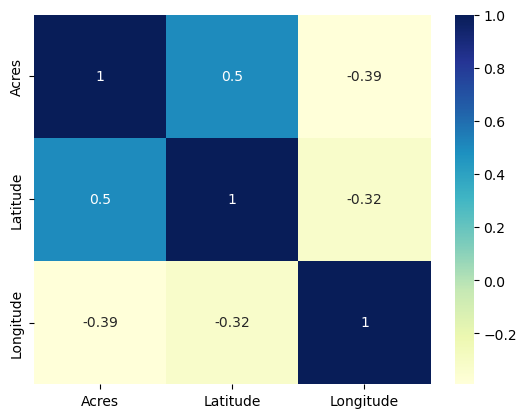

In [41]:
sb.heatmap(combined.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [30]:
X = combined['Acres']
y = combined['Latitude']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Latitude   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                 2.716e+04
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:40:09   Log-Likelihood:            -2.9704e+05
No. Observations:               83473   AIC:                         5.941e+05
Df Residuals:                   83471   BIC:                         5.941e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.3618      0.034   1099.923      0.000      37.295      37.428
Acres        3.01e-06   1.83e-08    164.817      0.000    2.97e-06    3.05e-06
==============================================================================
Omnibus:                      796.138   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              892.181
Skew:                          -0.198   Prob(JB):                    1.84e-194
Kurtosis:                       3.315   Cond. No.                     2.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

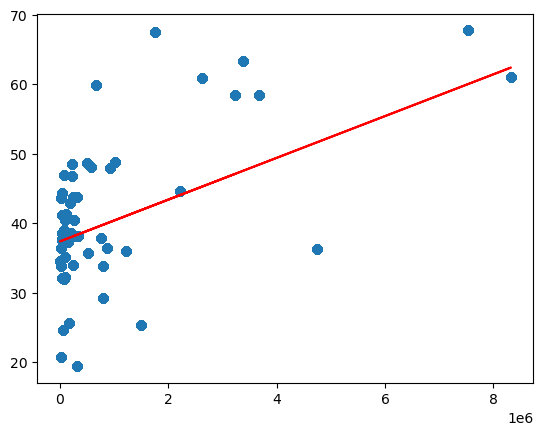

In [32]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 37.3618 + 3.01e-06*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

C:\Users\kelle\AppData\Local\Temp\ipykernel_5432\3000308409.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(res, bins = 15)


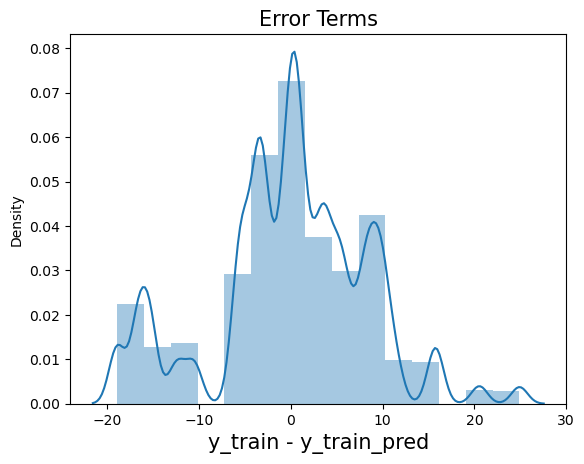

In [38]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

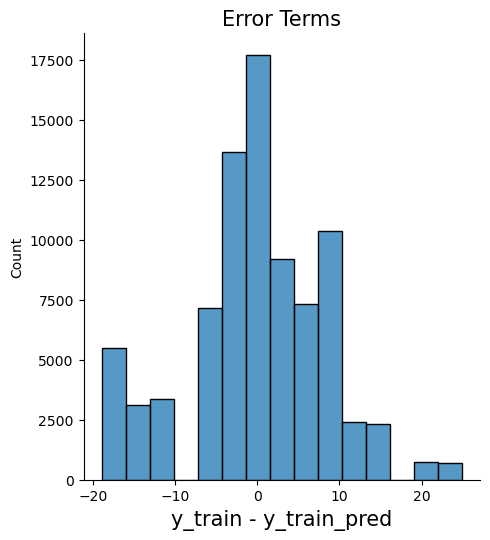

In [39]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# fig = plt.figure()
sb.displot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.246
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? No 
3. Was your plot of the error terms a bell curve? No